# NYC311 - Customer Service Requests Analysis

## DESCRIPTION

**Background of Problem Statement :**

NYC 311's mission is to provide the public with quick and easy access to all New York City government services and information while offering the best customer service. Each day, NYC311 receives thousands of requests related to several hundred types of non-emergency services, including noise complaints, plumbing issues, and illegally parked cars. These requests are received by NYC311 and forwarded to the relevant agencies such as the police, buildings, or transportation. The agency responds to the request, addresses it, and then closes it.

**Problem Objective :**

Perform a service request data analysis of New York City 311 calls. You will focus on the data wrangling techniques to understand the pattern in the data and also visualize the major complaint types.
Domain: Customer Service

**Analysis Tasks to be performed:**

(Perform a service request data analysis of New York City 311 calls) 

Import a 311 NYC service request.
Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing. (Hint: Explore the package/module datetime)
Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.
Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.
Perform a statistical test for the following:

In [1]:
#import library
import pandas as pd
import numpy as np
#import seaborn as sns
import geopandas
import matplotlib.pyplot as plt
import contextily as cx

In [32]:
path_to_data = geopandas.datasets.get_path("nybb")
gdf = geopandas.read_file(path_to_data)

#gdf['BoroName_Upper']=gdf['BoroName'].upper()
gdf["area"] = gdf.area
gdf

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry,area
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227....",1.623822e+09
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957...",3.045214e+09
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100...",1.937478e+09
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940....",6.364712e+08
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278...",1.186926e+09


In [4]:
gdf.dtypes

BoroCode         int64
BoroName        object
Shape_Leng     float64
Shape_Area     float64
geometry      geometry
area           float64
dtype: object

<AxesSubplot:>

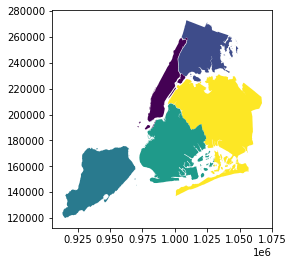

In [6]:
gdf.plot('area')

In [8]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [10]:
world.geom_type

0      MultiPolygon
1           Polygon
2           Polygon
3      MultiPolygon
4      MultiPolygon
           ...     
172         Polygon
173         Polygon
174         Polygon
175         Polygon
176         Polygon
Length: 177, dtype: object

In [33]:
#convert BoroName elements to upper case and rename column
gdf['BoroName']=gdf['BoroName'].str.upper()
gdf_subset=gdf[['BoroName','geometry']]
gdf_subset_rename=gdf_subset.rename(columns={'BoroName':'Borough'})
gdf_subset_rename

,Borough,geometry
0,STATEN ISLAND,"MULTIPOLYGON (((970217.022 145643.332, 970227...."
1,QUEENS,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
2,BROOKLYN,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
3,MANHATTAN,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
4,BRONX,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."


In [2]:
#read csv file
df=pd.read_csv('s3://simplilearn-project/311_Service_Requests_from_2010_to_Present.csv')
df.head()

C:\Users\anw_1\anaconda3\envs\project\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [3]:
#determine the number of rows and columns
df.shape

(300698, 53)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [5]:
#determine if there are missing values
df.isna().any()

Unique Key                        False
Created Date                      False
Closed Date                        True
Agency                            False
Agency Name                       False
Complaint Type                    False
Descriptor                         True
Location Type                      True
Incident Zip                       True
Incident Address                   True
Street Name                        True
Cross Street 1                     True
Cross Street 2                     True
Intersection Street 1              True
Intersection Street 2              True
Address Type                       True
City                               True
Landmark                           True
Facility Type                      True
Status                            False
Due Date                           True
Resolution Description            False
Resolution Action Updated Date     True
Community Board                   False
Borough                           False


In [6]:
df.isna().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

Apply method chaining
https://towardsdatascience.com/the-unreasonable-effectiveness-of-method-chaining-in-pandas-15c2109e3c69

In [7]:
#drop columns with no data
#drop column Landmark ,School or Citywide Complaint, Vehicle Type, Taxi Company Borough, 
#Taxi Pick Up Location, Bridge Highway Name, Bridge Highway Direction
#Road Ramp Bridge Highway Segment Garage Lot Name Ferry Direction Ferry Terminal Name
drop_columns=["Landmark","School or Citywide Complaint","Vehicle Type","Taxi Company Borough"
             ,"Taxi Pick Up Location","Bridge Highway Name","Bridge Highway Direction",
             "Road Ramp","Bridge Highway Segment","Garage Lot Name","Ferry Direction",
             "Ferry Terminal Name"]
df_subset=df.drop(columns=drop_columns,axis=1)

In [8]:
#new shape of the dataset after dropping columns
df_subset.shape

(300698, 41)

In [9]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 41 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [10]:
#number of records in each category, user value_counts
df_subset["Complaint Type"].value_counts()

Blocked Driveway             77044
Illegal Parking              75361
Noise - Street/Sidewalk      48612
Noise - Commercial           35577
Derelict Vehicle             17718
Noise - Vehicle              17083
Animal Abuse                  7778
Traffic                       4498
Homeless Encampment           4416
Noise - Park                  4042
Vending                       3802
Drinking                      1280
Noise - House of Worship       931
Posting Advertisement          650
Urinating in Public            592
Bike/Roller/Skate Chronic      427
Panhandling                    307
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Ferry Complaint                  2
Animal in a Park                 1
Name: Complaint Type, dtype: int64

In [11]:
#Descriptor	Location Type
df_subset["Descriptor"].value_counts()

Loud Music/Party                  61430
No Access                         56976
Posted Parking Sign Violation     22440
Loud Talking                      21584
Partial Access                    20068
With License Plate                17718
Blocked Hydrant                   16081
Commercial Overnight Parking      12189
Car/Truck Music                   11273
Blocked Sidewalk                  11121
Double Parked Blocking Traffic     5731
Double Parked Blocking Vehicle     4211
Engine Idling                      4189
Banging/Pounding                   4165
Neglected                          3787
Car/Truck Horn                     3511
Congestion/Gridlock                2761
In Prohibited Area                 2025
Other (complaint details)          1969
Unlicensed                         1777
Overnight Commercial Storage       1757
Unauthorized Bus Layover           1367
Truck Route Violation              1014
In Public                           932
Tortured                            854


In [12]:
df_subset["Location Type"].value_counts()

Street/Sidewalk               249299
Store/Commercial               20381
Club/Bar/Restaurant            17360
Residential Building/House      6960
Park/Playground                 4773
House of Worship                 929
Residential Building             227
Highway                          215
Parking Lot                      117
House and Store                   93
Vacant Lot                        77
Commercial                        62
Roadway Tunnel                    35
Subway Station                    34
Bridge                             2
Ferry                              1
Terminal                           1
Park                               1
Name: Location Type, dtype: int64

In [13]:
pd.unique(df_subset["Agency"])

array(['NYPD'], dtype=object)

In [14]:
pd.unique(df_subset["Agency Name"])

array(['New York City Police Department', 'NYPD',
       'Internal Affairs Bureau'], dtype=object)

In [15]:
pd.unique(df_subset["Community Board"])

array(['12 MANHATTAN', '01 QUEENS', '07 BRONX', '10 BRONX', '04 QUEENS',
       '07 BROOKLYN', '03 BRONX', '09 QUEENS', '11 BROOKLYN', '03 QUEENS',
       '05 BRONX', '05 BROOKLYN', '05 QUEENS', '06 QUEENS', '12 QUEENS',
       '06 BROOKLYN', '18 BROOKLYN', '10 MANHATTAN', '04 BRONX',
       '12 BRONX', '09 MANHATTAN', '10 QUEENS', '07 MANHATTAN',
       '02 BROOKLYN', '03 BROOKLYN', '11 BRONX', '0 Unspecified',
       '08 BROOKLYN', '01 BROOKLYN', '03 STATEN ISLAND', '06 MANHATTAN',
       '03 MANHATTAN', '10 BROOKLYN', '11 MANHATTAN', '07 QUEENS',
       '11 QUEENS', '17 BROOKLYN', '13 QUEENS', '06 BRONX',
       '04 MANHATTAN', '14 BROOKLYN', '12 BROOKLYN', '08 MANHATTAN',
       '13 BROOKLYN', '15 BROOKLYN', '01 STATEN ISLAND', '09 BRONX',
       '02 STATEN ISLAND', '02 QUEENS', '16 BROOKLYN', '08 QUEENS',
       '09 BROOKLYN', '04 BROOKLYN', '14 QUEENS', '05 MANHATTAN',
       '08 BRONX', '02 BRONX', '02 MANHATTAN', '01 BRONX', '01 MANHATTAN',
       '83 QUEENS', '95 STATEN ISLAND

In [16]:
df_subset["Agency Name"].value_counts()

New York City Police Department    300690
Internal Affairs Bureau                 6
NYPD                                    2
Name: Agency Name, dtype: int64

In [17]:
#find NYPD in the column and replace with New York City Police department. Using the replace() method
#check if the replace method has worked
df_subset["Agency Name"]=df_subset["Agency Name"].replace({"NYPD":"New York City Police Department"})
df_subset["Agency Name"].value_counts()

New York City Police Department    300692
Internal Affairs Bureau                 6
Name: Agency Name, dtype: int64

In [18]:
df_subset["City"].value_counts()

BROOKLYN               98307
NEW YORK               65994
BRONX                  40702
STATEN ISLAND          12343
JAMAICA                 7296
ASTORIA                 6330
FLUSHING                5971
RIDGEWOOD               5163
CORONA                  4295
WOODSIDE                3544
SOUTH RICHMOND HILL     2774
OZONE PARK              2755
EAST ELMHURST           2734
ELMHURST                2673
WOODHAVEN               2464
MASPETH                 2462
LONG ISLAND CITY        2437
SOUTH OZONE PARK        2173
RICHMOND HILL           1904
FRESH MEADOWS           1899
QUEENS VILLAGE          1814
MIDDLE VILLAGE          1765
JACKSON HEIGHTS         1689
FOREST HILLS            1688
REGO PARK               1486
BAYSIDE                 1221
COLLEGE POINT           1220
FAR ROCKAWAY            1179
WHITESTONE              1098
HOLLIS                  1012
HOWARD BEACH             931
ROSEDALE                 922
SPRINGFIELD GARDENS      883
SAINT ALBANS             834
KEW GARDENS   

In [19]:
df_subset['Borough'].value_counts()


BROOKLYN         98307
QUEENS           80641
MANHATTAN        66131
BRONX            40702
STATEN ISLAND    12343
Unspecified       2574
Name: Borough, dtype: int64

In [30]:
#filters rows to exclude records where Borough is not equal to Unspecified
df_subset_borough=df_subset[df_subset['Borough']!='Unspecified']
df_subset_borough.groupby(['Borough'])['Borough'].count()

Borough
BRONX            40702
BROOKLYN         98307
MANHATTAN        66131
QUEENS           80641
STATEN ISLAND    12343
Name: Borough, dtype: int64

In [31]:
df_subset_borough=df_subset_borough.groupby(['Borough'])['Borough'].count()
df_subset_borough=df_subset_borough.to_frame().rename(columns={'Borough':'number_of_record'})
df_subset_borough

,number_of_record
Borough,
BRONX,40702
BROOKLYN,98307
MANHATTAN,66131
QUEENS,80641
STATEN ISLAND,12343


In [20]:
df_subset_borough.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [34]:
#add polygon data to the dataframe df_subset_merge
df_subset_merge=pd.merge(df_subset_borough,gdf_subset_rename, on="Borough",how="left")
df_subset_merge

,Borough,number_of_record,geometry
0,BRONX,40702,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."
1,BROOKLYN,98307,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
2,MANHATTAN,66131,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
3,QUEENS,80641,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
4,STATEN ISLAND,12343,"MULTIPOLYGON (((970217.022 145643.332, 970227...."


In [ ]:
df_subset_merge['Borough'].value_counts(), df_subset_merge.shape

In [35]:
gdf_burough=geopandas.GeoDataFrame(df_subset_merge, geometry='geometry')


In [22]:
gdf_burough = geopandas.GeoDataFrame(
    df_subset_borough, geometry=geopandas.points_from_xy(df_subset_borough.Longitude, df_subset_borough.Latitude))

In [36]:
gdf_burough

,Borough,number_of_record,geometry
0,BRONX,40702,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."
1,BROOKLYN,98307,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
2,MANHATTAN,66131,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
3,QUEENS,80641,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
4,STATEN ISLAND,12343,"MULTIPOLYGON (((970217.022 145643.332, 970227...."


In [46]:
gdf_burough['coords']=gdf_burough['geometry'].apply(lambda x:x.representative_point().coords[:])
gdf_burough['coords'] = [coords[0] for coords in gdf_burough['coords']]
gdf_burough

,Borough,number_of_record,geometry,coords
0,BRONX,40702,"MULTIPOLYGON (((1012821.806 229228.265, 101278...","(1021230.8252189507, 251186.33629250404)"
1,BROOKLYN,98307,"MULTIPOLYGON (((1021176.479 151374.797, 102100...","(998506.9400731353, 177674.6976928711)"
2,MANHATTAN,66131,"MULTIPOLYGON (((981219.056 188655.316, 980940....","(995258.5039826182, 226631.0523071289)"
3,QUEENS,80641,"MULTIPOLYGON (((1029606.077 156073.814, 102957...","(1033983.965822806, 196127.3905029297)"
4,STATEN ISLAND,12343,"MULTIPOLYGON (((970217.022 145643.332, 970227....","(943802.6851148934, 147890.05410766602)"


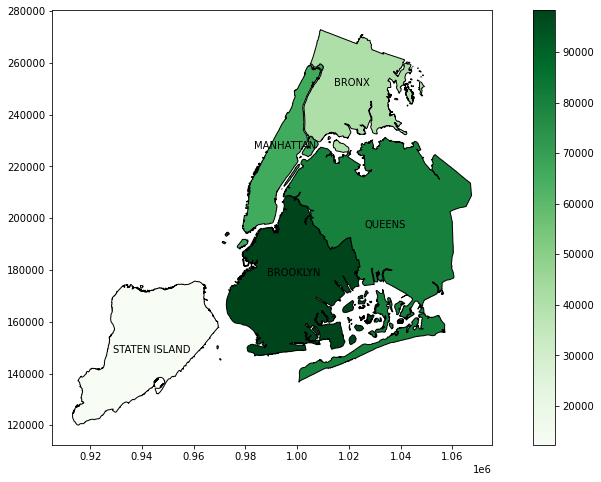

In [58]:
ax=gdf_burough.plot(column='number_of_record',cmap='Greens',legend=True,figsize = (15,8),edgecolor='k')
for idx, row in gdf_burough.iterrows():
    plt.annotate(text=row['Borough'], xy=row['coords'],
                 horizontalalignment='center')

In [5]:
import contextily as ctx

In [57]:
df_burough_test=gdf_burough.to_crs(epsg=3857)

In [63]:
ctx.add_basemap(ax)

AttributeError: module 'contextily' has no attribute 'add_basemap'

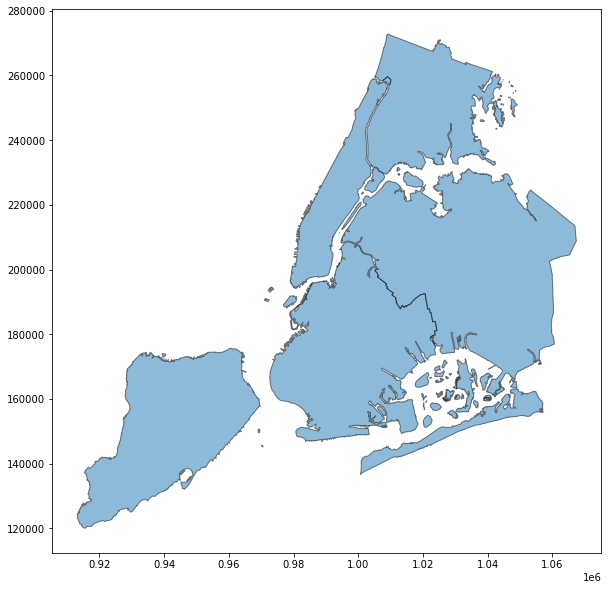

In [2]:
df1 = geopandas.read_file(geopandas.datasets.get_path('nybb'))
ax = df1.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

In [3]:
df1 = df1.to_crs(epsg=3857)

In [4]:
type(df1)

geopandas.geodataframe.GeoDataFrame

AttributeError: module 'contextily' has no attribute 'add_basemap'

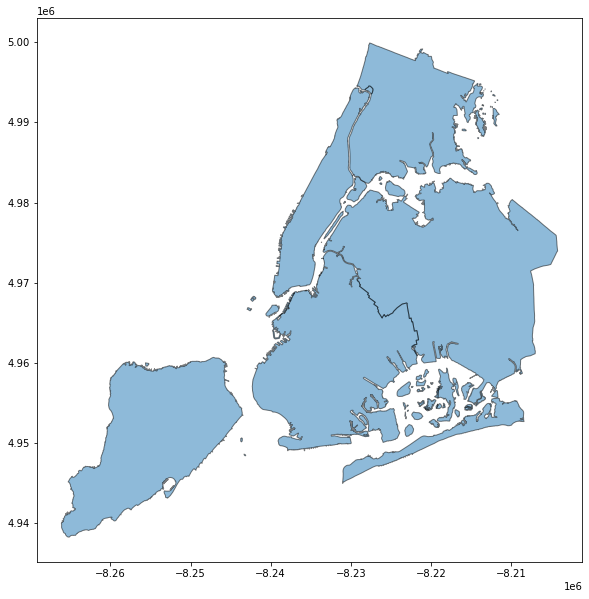

In [6]:
ax = df1.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)

In [ ]:
gdf.head()

In [ ]:
gdf.shape 
gdf['record_instance']=1

In [37]:
gdf_burough.dtypes

Borough               object
number_of_record       int64
geometry            geometry
dtype: object

In [ ]:
gdf.geom_type.head()

In [ ]:

gdf_subset=gdf[['Borough','geometry','record_instance']]
city=gdf_subset.dissolve(by='Borough',aggfunc='sum')
city


In [ ]:
city.plot(column='record_instance'
          ,legend=True)

In [ ]:
city['area']=city.area
city['area']

In [ ]:
city

In [ ]:
city.plot(scheme='Quantiles')

In [ ]:
city.plot(column='record_instance')

In [ ]:
gdf_subset_borough.groupby(['Borough'])['Borough'].count()

In [ ]:
city=gdf_subset.dissolve(by='Borough',aggfunc='count')

In [ ]:
type(gdf)

In [ ]:
df_subset["Status"].value_counts(),df_subset["Facility Type"].value_counts()

In [ ]:
df_subset['Resolution Description'].value_counts()

In [ ]:
df_subset[['Created Date','Due Date','Resolution Action Updated Date','Closed Date']].head()

In [ ]:
df_subset['Resolution Description'].head()

In [ ]:
#change data types of Created Date, Due Date, Resolution Action Updated Date, Closed Date
df_subset["Created Date"]=pd.to_datetime(df_subset["Created Date"])
df_subset["Closed Date"]=pd.to_datetime(df_subset["Closed Date"])
df_subset['Due Date']=pd.to_datetime(df_subset['Due Date'])
df_subset['Resolution Action Updated Date']=pd.to_datetime(df_subset['Resolution Action Updated Date'])

In [ ]:
df_subset.dtypes

In [ ]:
#check if Resolution Action Updated Date & Closed Date columns are the same
df_subset['equal_resolution_closed_date']=(np.where(df_subset['Closed Date']==df_subset['Resolution Action Updated Date'],True,False))



In [ ]:
df_subset['equal_resolution_closed_date'].value_counts()

In [ ]:
df_subset["Created Date"].min(), df_subset["Created Date"].max()

In [ ]:
time_delta=df_subset["Created Date"].max() - df_subset["Created Date"].min()
print(time_delta)

In [ ]:
#Add column Request Closing Time
df_subset['Request_Closing_Time']=df_subset['Closed Date']-df_subset['Created Date']
df_subset['Request_Closing_Time (in mins)']=df_subset['Request_Closing_Time']/np.timedelta64(1,'m')
df_subset.head()

In [ ]:
# Average Response Time for each complaint type
df_subset.groupby('Complaint Type')['Request_Closing_Time'].agg(lambda x: x.mean()).sort_values(ascending=False)

In [ ]:
pd.set_option('display.max_rows',None)

In [ ]:
df_subset.groupby(['Complaint Type','Location Type'])['Request_Closing_Time'].agg(lambda x: x.mean())

In [ ]:
df_fillna=df_subset.fillna(
    value={
        'Closed Date':0
    }
)

In [ ]:
df_fillna.agg(
    {
        "Created Date":["min","max"]
        "Closed Date":["min","max"],
    }
)

In [ ]:
df_isna_closed_date=df_subset[df_subset["Closed Date"].isna()==True]
df_isna_closed_date.head()

In [ ]:
df_subset["Closed Date"].isna()

In [ ]:
df_isna_closed_date.agg({
    "Closed Date":["min","max"]
})

In [ ]:
df_isna_closed_date["Closed Date"].fillna(0)
df_isna_closed_date.head()

In [ ]:
df_isna_closed_date_0=df_isna_closed_date["Closed Date"].fillna(0)

In [ ]:
df_isna_closed_date_0.head()

In [ ]:
df_fillna=df_isna_closed_date.fillna(
    value={
        'Closed Date':0
    }
)

In [ ]:
df_isna_closed_date.agg({
    "Closed Date":["min","max"]
})

In [ ]:
df_fillna.head()

In [ ]:
df_fillna.agg({
    "Closed Date":["min","max"]
})

In [ ]:
pd.unique(df_subset['Status'])

In [ ]:
df_subset.groupby(['Status','Complaint Type'])['Status'].count()

In [ ]:
Complaint_Type_Borough = df_subset.groupby(['Complaint Type','Borough'])[['Request_Closing_Time (in mins)']].mean().unstack() #this line of code is converting a series data to a dataframe...because of the unstack method. We were getting a series, by applying the unstack method it convets to a dataframe. We need a dataframe to make plotting easy
 
col_number = 2
row_number = 3
fig, axes = plt.subplots(row_number,col_number, figsize=(12,12))
 
for i, (label,col) in enumerate(Complaint_Type_Borough.iteritems()): # this loop is iterating through every row in the dataframe. Dataframe is just a dictionary with key value pair.. Enumerate exposes the loop index 
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=True)[:5]
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)
    
plt.tight_layout()


In [ ]:
df_subset.groupby(['Complaint Type','Borough'])[['Request_Closing_Time (in mins)']].mean().unstack()

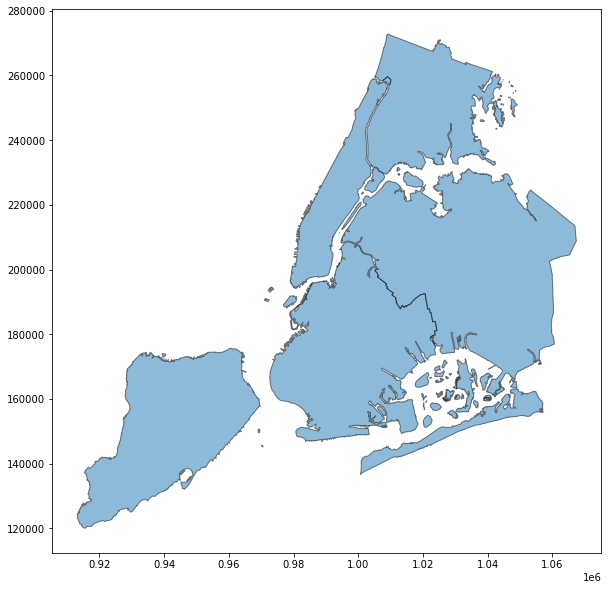

In [2]:
df = geopandas.read_file(geopandas.datasets.get_path('nybb'))
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

In [3]:
df.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - New York - SPCS - Long Island
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [4]:
df_wm = df.to_crs(epsg=3857)

AttributeError: module 'contextily' has no attribute 'add_basemap'

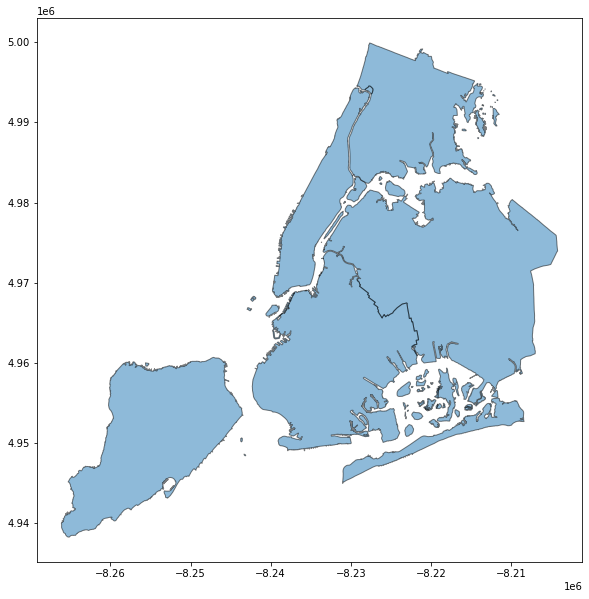

In [5]:
ax = df_wm.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
cx.add_basemap(ax)
cx.add_basemap